Part_1

In [29]:
import pandas as pd
import plotly.express as px

In [30]:
#ایمپورت دیتا
data = pd.read_csv('coins_data.xlsx - Sheet1.csv')
data

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3586504072,"985,239,504",PoS,Ethereum
1,UNI,9.918768e+07,3992451215,"1,000,000,000",PoS,Ethereum
2,WBTC,1.415410e+08,4237575489,"163,106",PoW,Ethereum
3,AVAX,2.197065e+08,4901630273,"431,804,080",PoS,Avalanche
4,DAI,2.177113e+08,5513660644,"5,347,888,596",stablecoin,Ethereum
5,SHIB,2.479944e+08,5606251419,"589,589,040,239,380",PoS,Ethereum
6,LTC,5.913019e+08,5729295460,"84,000,000",PoW,Litecoin
7,TRX,2.719028e+08,6018922345,"88,996,805,683",PoS,Tron
8,DOT,2.035592e+08,6659549868,"1,364,182,225",PoW,Polkadot
9,MATIC,4.232990e+08,8053184610,"10,000,000,000",PoS,Polygon


In [31]:
from sklearn.preprocessing import StandardScaler
#انتخاب ستون های مورد نظر برای خوشه بندی
subset_data = data[['Volume', 'MarketCap']]
subset_data = StandardScaler().fit_transform(subset_data)
subset_data

array([[-0.47164572, -0.41411995],
       [-0.4601297 , -0.41021383],
       [-0.45512025, -0.40785519],
       [-0.44587503, -0.4014655 ],
       [-0.44611101, -0.3955764 ],
       [-0.4425292 , -0.39468547],
       [-0.40192363, -0.39350151],
       [-0.43970138, -0.39071465],
       [-0.44778489, -0.38455039],
       [-0.4217946 , -0.37114051],
       [-0.39688566, -0.36828455],
       [-0.39721057, -0.34911321],
       [-0.42871377, -0.33211319],
       [ 0.12950864, -0.33188364],
       [-0.31227828, -0.22172191],
       [-0.03828817, -0.0895533 ],
       [-0.39133841, -0.01948183],
       [ 3.44897798,  0.26907471],
       [ 0.57414873,  1.43812015],
       [ 2.2446949 ,  3.96878013]])

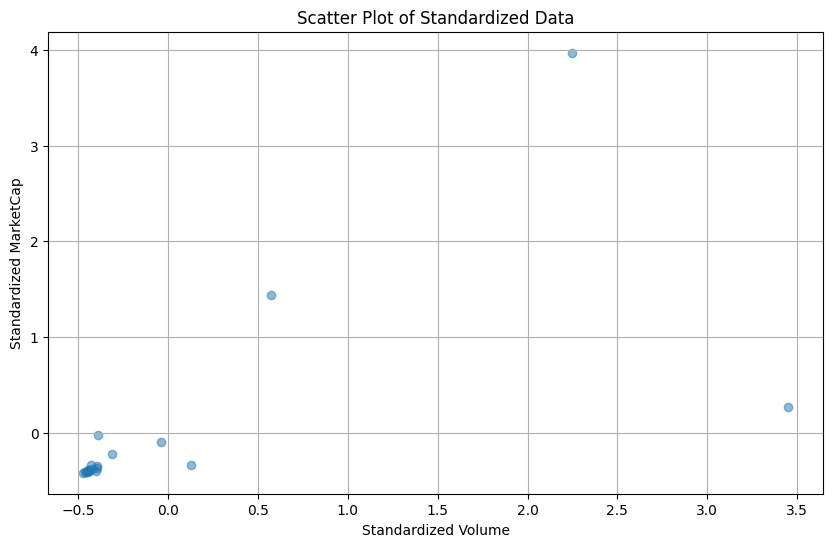

In [32]:
import matplotlib.pyplot as plt

subset_data = pd.DataFrame(subset_data, columns=['Volume', 'MarketCap'])
#رسم اسکترپلات برای مارکت کپ و حجم معاملاتی
plt.figure(figsize=(10, 6))
plt.scatter(subset_data['Volume'], subset_data['MarketCap'], alpha=0.5)
plt.xlabel('Standardized Volume')
plt.ylabel('Standardized MarketCap')
plt.title('Scatter Plot of Standardized Data')
plt.grid(True)
plt.show()

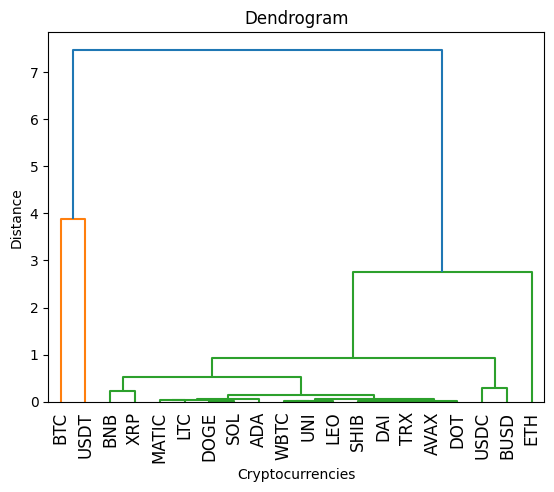

In [33]:
from scipy.cluster import hierarchy as shc
#خوشه بندی با متد واریانس
linkage_matrix = shc.linkage(subset_data, method='ward')
#رسم دندوگرام برای دو فیچر
shc.dendrogram(linkage_matrix, orientation='top', labels=data['Symbol'].values, distance_sort='descending')
plt.title('Dendrogram')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

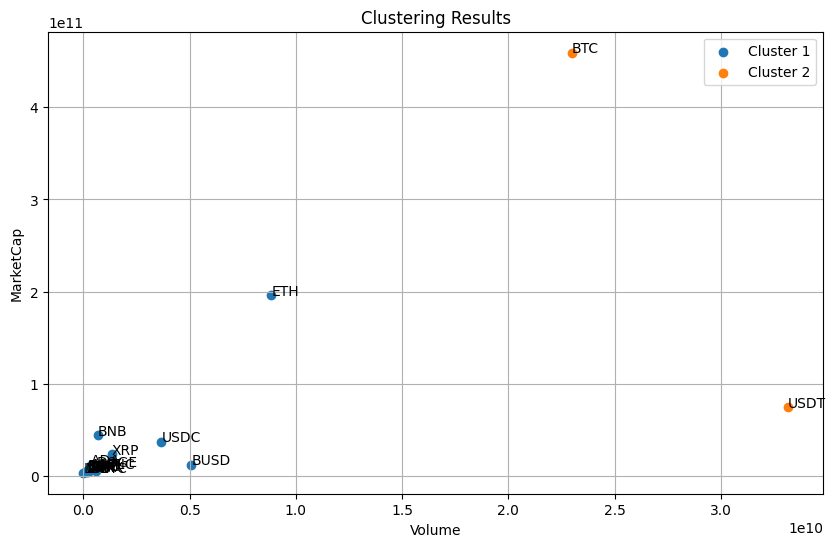

In [34]:
from scipy.cluster.hierarchy import fcluster
#ایجاد و نمایش خوشه ها
clusters = fcluster(linkage_matrix, t=2, criterion='maxclust')
data_copy = data.copy()
data_copy['Cluster'] = clusters
plt.figure(figsize=(10, 6))
for i in range(1, 3):
    cluster = data_copy[data_copy['Cluster'] == i]
    #نمایش خوشه ها بر اساس فاصله محاسبه شده طبق مارکت کپ و حجم معاملاتی
    plt.scatter(cluster['Volume'], cluster['MarketCap'], label=f'Cluster {i}')
    #نمایش نام کوین ها
    for index, row in cluster.iterrows():
        plt.annotate(row['Symbol'], (row['Volume'], row['MarketCap']))

plt.xlabel('Volume')
plt.ylabel('MarketCap')
plt.title('Clustering Results')
plt.legend()
plt.grid(True)
plt.show()

در این قسمت همانطور که در دندوگرام مشاهده میشود بیت کوین و تتر بدلیل حجم بالای هم مارکت کپ و هم حجم معاملاتی به هم شبیه ترند و در یک دسته قرار گرفته اند

Part_2

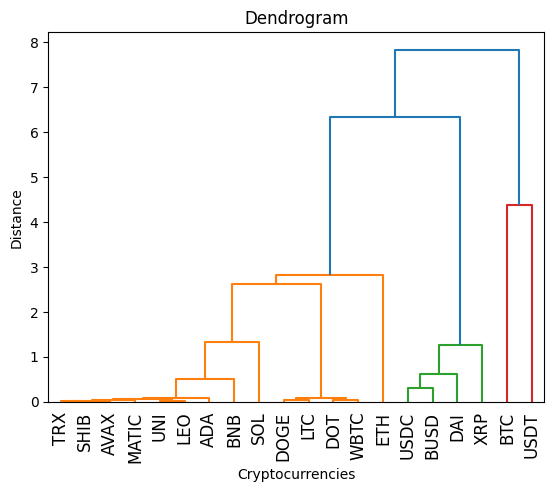

In [35]:
from sklearn.preprocessing import LabelEncoder
#انکود کردن استرینگ های فیچر جدید به روش لیبل انکودینگ
label_encoder = LabelEncoder()
data_cp = data.copy()
data_cp['ProoftypeEncoded'] = label_encoder.fit_transform(data['ProofType'])
sub_data = pd.concat([subset_data, data_cp['ProoftypeEncoded']], axis=1)
#خوشه بندی بر اساس سه فیچر با متد واریانس
result = shc.linkage(sub_data, method='ward')
shc.dendrogram(result, orientation='top', labels=data_cp['Symbol'].values, distance_sort='descending')
plt.title('Dendrogram')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

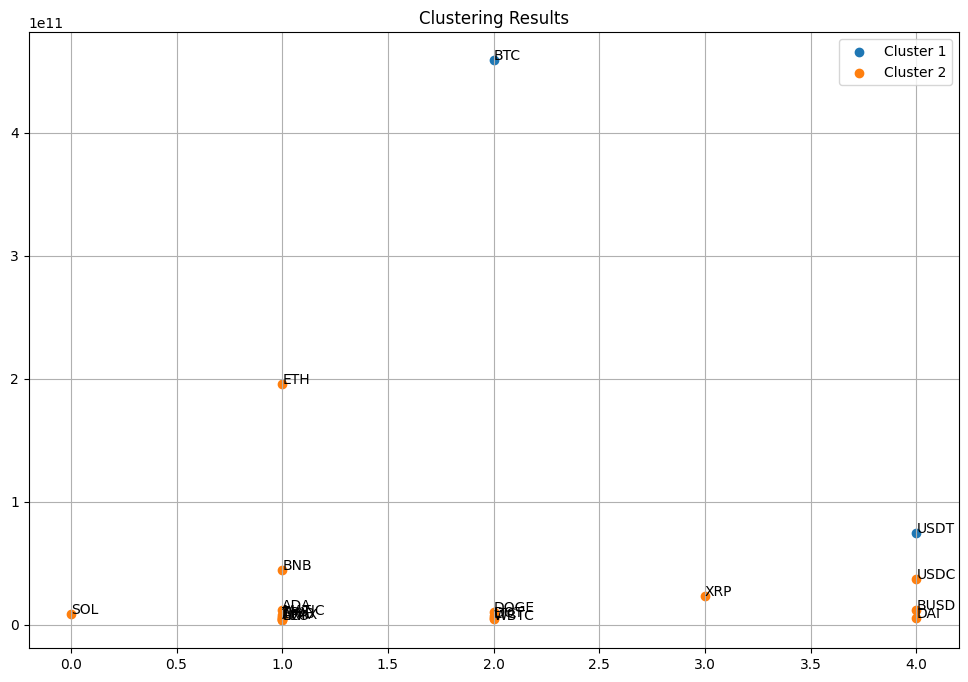

In [36]:
#نمایش کلاستر ها
clusters = fcluster(result, t=2, criterion='maxclust')
data_cp['Cluster'] = clusters

plt.figure(figsize=(12, 8))
for i in range(1, 3):
    cluster = data_cp[data_cp['Cluster'] == i]
    #نمایس بر اسا پروف تایپ و مارکت کپ برای ویژوالایز بهتر، بدلیل سختی سه بعدی رسم کردن والیوم نمایش داده نشده
    plt.scatter(cluster['ProoftypeEncoded'], cluster['MarketCap'], label=f'Cluster {i}')
    for index, row in cluster.iterrows():
        plt.annotate(row['Symbol'], (row['ProoftypeEncoded'], row['MarketCap']))

plt.title('Clustering Results')
plt.legend()
plt.grid(True)
plt.show()

در این قسمت با وجود تفاوت در دندوگرام باز هم نتیجه یکسان شده و ارتفاع تتر و بیت کوین ثابت مانده چون این فیچر جدید تاثیری روی کلاسترینگ ما اعمال نمیکند و برای مثال بیت کوین و تتر فارغ از پروف تایپشان که متفاوت هم هست باز هم در یک دسته قرار میگیرند.

In [37]:

Dimensions = {
    'Volume': cluster['Volume'],
    'MarketCap': cluster['MarketCap'],
    'Prooftype': cluster['ProofType']
}

Dimensions = pd.DataFrame(Dimensions)
# رسم نمودار سه بعدی
fig = px.scatter_3d(Dimensions, x='Volume', y='MarketCap', z='Prooftype')
fig.update_layout(width=900, height=800)

# نمایش نمودار
fig.show()


Part_3

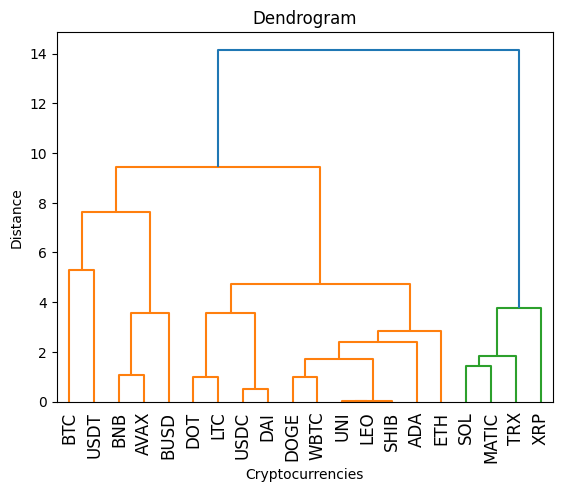

In [38]:
from sklearn.preprocessing import LabelEncoder
#اضافه کردن فیچر جدید و انکود کردن آن با لیبل انکودینگ
label_encoder = LabelEncoder()

data_cpy = data.copy()
data_cpy['ProoftypeEncoded'] = label_encoder.fit_transform(data['ProofType'])
data_cpy['NetworkEncoded'] = label_encoder.fit_transform(data['Network'])
sub_data = pd.concat([subset_data, data_cpy['ProoftypeEncoded'], data_cpy['NetworkEncoded']], axis=1)
#خوشه بندی چهار فیچر بر اساس متد واریانس
result = shc.linkage(sub_data, method='ward')
shc.dendrogram(result, orientation='top', labels=data_cpy['Symbol'].values, distance_sort='descending')
plt.title('Dendrogram')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


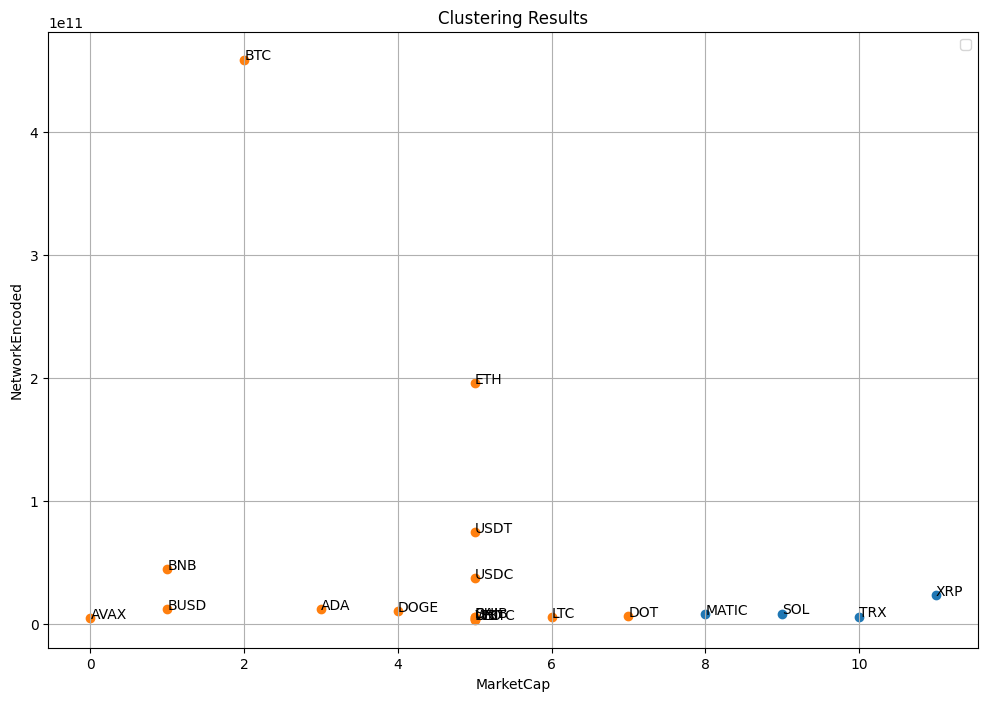

In [39]:
#نمایش کلاستر های نهایی
clusters = fcluster(result, t=2, criterion='maxclust')
data_cpy['Cluster'] = clusters
plt.figure(figsize=(12, 8))
for i in range(1, 3):
    cluster = data_cpy[data_cpy['Cluster'] == i]
    plt.scatter(cluster['NetworkEncoded'], cluster['MarketCap'])
    for index, row in cluster.iterrows():
        plt.annotate(row['Symbol'], (row['NetworkEncoded'], row['MarketCap']))

plt.ylabel('NetworkEncoded')
plt.xlabel('MarketCap')
plt.title('Clustering Results')
plt.legend()
plt.grid(True)
plt.show()

در این قسمت اما با اضافه کردن فیچر جدید، ارتفاع بیت کوین و تتر کمتر شده که به منزله کاهش شباهت آن ها با در نظر گرفتن فیچر جدید است.

In [40]:
Dimensions = {
    'Volume': cluster['Volume'],
    'MarketCap': cluster['MarketCap'],
    'Network': cluster['Network']
}

Dimensions = pd.DataFrame(Dimensions)
# رسم نمودار سه بعدی
fig = px.scatter_3d(Dimensions, x='Volume', y='MarketCap', z='Network')
fig.update_layout(width=1000, height=800)

# نمایش نمودار
fig.show()


Extra Features

Feature_1: TotalSupply

In [41]:
def remove_commas_and_convert_to_float(value):
    if value == '866,300,000.00':
        value = '866,300,000'
    value = ''.join(value.split(','))  # Remove commas
    return float(value)

# Apply the function to the specified column
data['TotalSupply'] = data['TotalSupply'].apply(remove_commas_and_convert_to_float)
data['TotalSupply'] 

0     9.852395e+08
1     1.000000e+09
2     1.631060e+05
3     4.318041e+08
4     5.347889e+09
5     5.895890e+14
6     8.400000e+07
7     8.899681e+10
8     1.364182e+09
9     1.000000e+10
10    5.595096e+08
11    1.413394e+11
12    3.624429e+10
13    2.213836e+09
14    9.998838e+10
15    2.554032e+10
16    1.538456e+08
17    8.663000e+08
18    1.202492e+08
19    1.950842e+07
Name: TotalSupply, dtype: float64

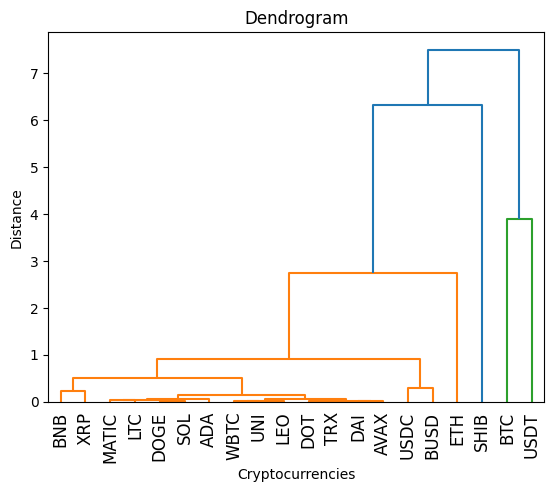

In [42]:
subset_data = data[['Volume', 'MarketCap', 'TotalSupply']]
subset_data = StandardScaler().fit_transform(subset_data)
result = shc.linkage(subset_data, method='ward')
shc.dendrogram(result, orientation='top', labels=data['Symbol'].values, distance_sort='descending')
plt.title('Dendrogram')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

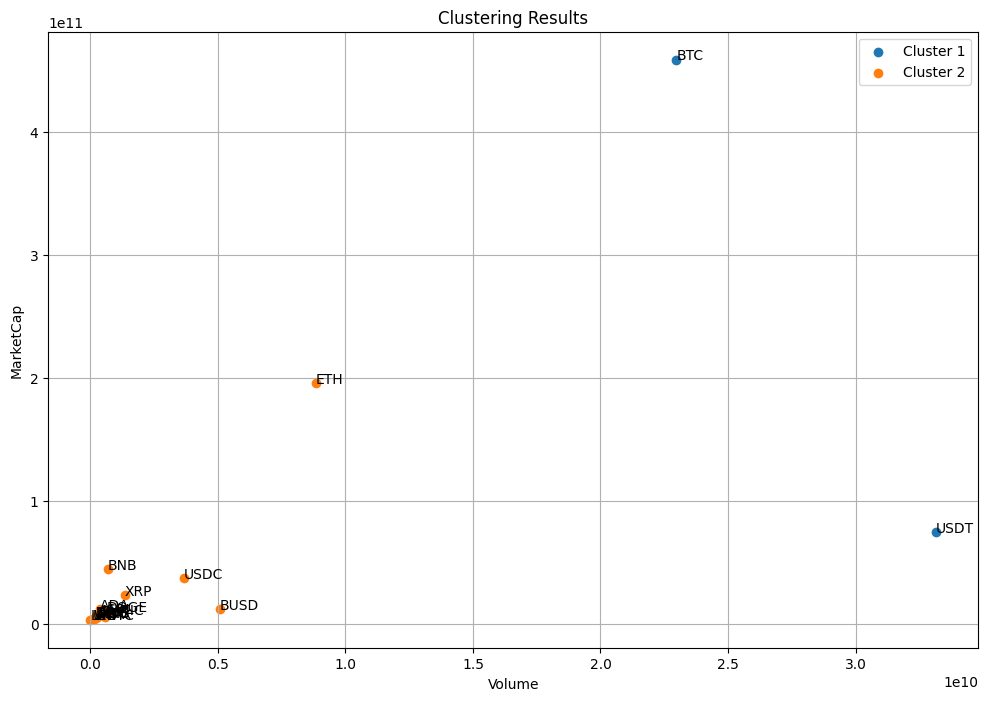

In [43]:
clusters = fcluster(result, t=2, criterion='maxclust')
data_copy['Cluster'] = clusters.copy()

plt.figure(figsize=(12, 8))
for i in range(1, 3):
    cluster = data_copy[data_copy['Cluster'] == i]
    plt.scatter(cluster['Volume'], cluster['MarketCap'], label=f'Cluster {i}')
    for index, row in cluster.iterrows():
        plt.annotate(row['Symbol'], (row['Volume'], row['MarketCap']))

plt.xlabel('Volume')
plt.ylabel('MarketCap')
plt.title('Clustering Results')
plt.legend()
plt.grid(True)
plt.show()

In [44]:

Dimensions = {
    'Volume': cluster['Volume'],
    'MarketCap': cluster['MarketCap'],
    'TotalSupply': cluster['TotalSupply']
}

Dimensions = pd.DataFrame(Dimensions)
# رسم نمودار سه بعدی
fig = px.scatter_3d(Dimensions, x='Volume', y='MarketCap', z='TotalSupply')
fig.update_layout(width=1000, height=800)

# نمایش نمودار
fig.show()


In [52]:
data

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network,MarketDominance,CirculatingSup
0,LEO,1.823284e+06,3586504072,9.852395e+08,PoS,Ethereum,0.384617,929022784
1,UNI,9.918768e+07,3992451215,1.000000e+09,PoS,Ethereum,0.428151,106912512
2,WBTC,1.415410e+08,4237575489,1.631060e+05,PoW,Ethereum,0.454438,163106
3,AVAX,2.197065e+08,4901630273,4.318041e+08,PoS,Avalanche,0.525652,354834080
4,DAI,2.177113e+08,5513660644,5.347889e+09,stablecoin,Ethereum,0.591286,5347888640
5,SHIB,2.479944e+08,5606251419,5.895890e+14,PoS,Ethereum,0.601215,589346889531392
6,LTC,5.913019e+08,5729295460,8.400000e+07,PoW,Litecoin,0.614410,73779672
7,TRX,2.719028e+08,6018922345,8.899681e+10,PoS,Tron,0.645470,88900517888
8,DOT,2.035592e+08,6659549868,1.364182e+09,PoW,Polkadot,0.714171,1265961344
9,MATIC,4.232990e+08,8053184610,1.000000e+10,PoS,Polygon,0.863625,9299803136


Feature_2: MarketDominance

In [53]:
# from sklearn.preprocessing import LabelEncoder
# total_market_cap = sum(data["MarketCap"])
# data['MarketDominance']=(data["MarketCap"] / total_market_cap) * 100
# label_encoder = LabelEncoder()

# data_copy = data.copy()
# data_copy['ProoftypeEncoded'] = label_encoder.fit_transform(data['ProofType'])
# sub_data = pd.concat([subset_data, data_copy['MarketDominance']], axis=1)

# result = shc.linkage(sub_data, method='ward')
# shc.dendrogram(result, orientation='top', labels=data_copy['Symbol'].values, distance_sort='descending')
# plt.title('Dendrogram')
# plt.xlabel('Cryptocurrencies')
# plt.ylabel('Distance')
# plt.xticks(rotation=90)
# plt.show()
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming subset_data is already a DataFrame
# Assuming data is already a DataFrame

total_market_cap = sum(data["MarketCap"])
data['MarketDominance'] = (data["MarketCap"] / total_market_cap) * 100
label_encoder = LabelEncoder()

data_copy = data.copy()
data_copy['ProoftypeEncoded'] = label_encoder.fit_transform(data['ProofType'])

# Convert subset_data to a DataFrame if it's not already
subset_data = pd.DataFrame(subset_data, columns=['Volume', 'MarketCap'])

# Concatenate data
sub_data = pd.concat([subset_data, data_copy[['MarketDominance']]], axis=1)

result = shc.linkage(sub_data, method='ward')
shc.dendrogram(result, orientation='top', labels=data_copy['Symbol'].values, distance_sort='descending')
plt.title('Dendrogram')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()


ValueError: Shape of passed values is (20, 3), indices imply (20, 2)

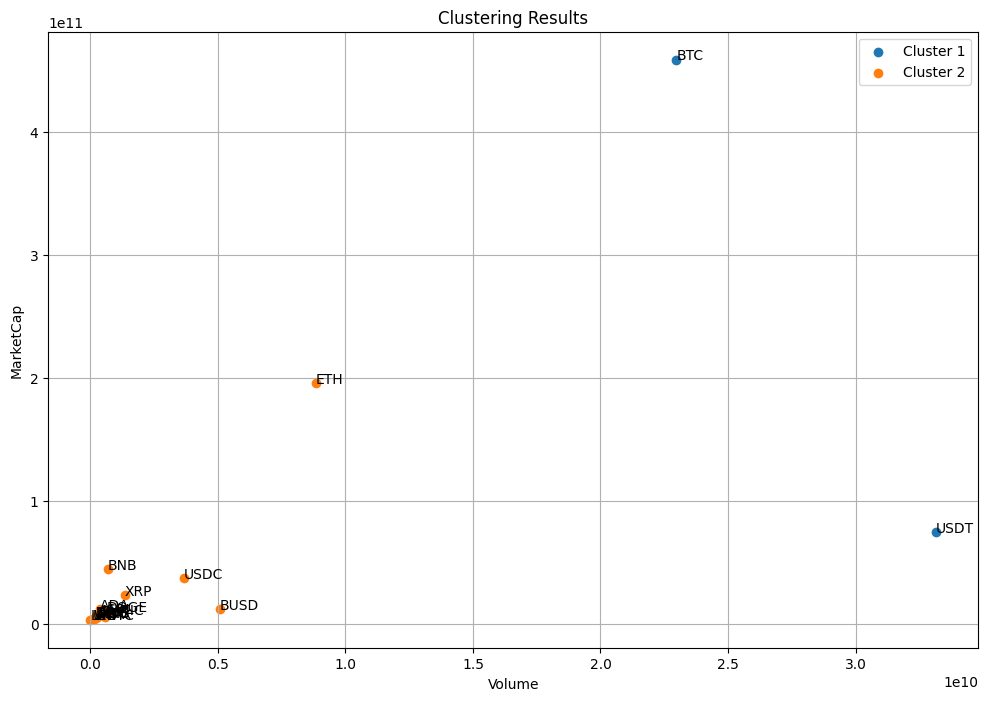

In [46]:
clusters = fcluster(result, t=2, criterion='maxclust')
data_copy['Cluster'] = clusters.copy()

plt.figure(figsize=(12, 8))
for i in range(1, 3):
    cluster = data_copy[data_copy['Cluster'] == i]
    plt.scatter(cluster['Volume'], cluster['MarketCap'], label=f'Cluster {i}')
    for index, row in cluster.iterrows():
        plt.annotate(row['Symbol'], (row['Volume'], row['MarketCap']))

plt.xlabel('Volume')
plt.ylabel('MarketCap')
plt.title('Clustering Results')
plt.legend()
plt.grid(True)
plt.show()

In [47]:

Dimensions = {
    'Volume': cluster['Volume'],
    'MarketCap': cluster['MarketCap'],
    'MarketDominance': cluster['MarketDominance']
}

Dimensions = pd.DataFrame(Dimensions)
# رسم نمودار سه بعدی
fig = px.scatter_3d(Dimensions, x='Volume', y='MarketCap', z='MarketDominance')
fig.update_layout(width=1000, height=800)

# نمایش نمودار
fig.show()


Feature_3: CirculatingSup

In [48]:
import yfinance as yf

### First get a list of our coins from main dataset
### And add '-USD' suffix so that yfinance is happy :)
crypto_coins = [f'{s}-USD' for s in data['Symbol']]

### Create an empty dictionary to store the circulating supply for each coin
circulating_supply = {}

### Fetch data for each coin and extract circulating supply
### Using yfinance module
for coin in crypto_coins:
    ticker = yf.Ticker(coin)
    ### Get all info here
    info = ticker.info  
    ### Select only circulating_supply  
    circulating_supply[coin] = info.get('circulatingSupply')

### Print the circulating supply for each coin for confirmation
for coin, supply in circulating_supply.items():
    print(f'{coin}: Circulating Supply = {supply}')

### Add our new feature (circulating supply) to main(default) dataframe (Q2_data.csv)
data['CirculatingSup'] = circulating_supply.values()

LEO-USD: Circulating Supply = 929022784
UNI-USD: Circulating Supply = 106912512
WBTC-USD: Circulating Supply = 163106
AVAX-USD: Circulating Supply = 354834080
DAI-USD: Circulating Supply = 5347888640
SHIB-USD: Circulating Supply = 589346889531392
LTC-USD: Circulating Supply = 73779672
TRX-USD: Circulating Supply = 88900517888
DOT-USD: Circulating Supply = 1265961344
MATIC-USD: Circulating Supply = 9299803136
SOL-USD: Circulating Supply = 416599712
DOGE-USD: Circulating Supply = 141479018496
ADA-USD: Circulating Supply = 35218583552
BUSD-USD: Circulating Supply = 2102166528
XRP-USD: Circulating Supply = 53441028096
USDC-USD: Circulating Supply = 25392713728
BNB-USD: Circulating Supply = 151705408
USDT-USD: Circulating Supply = 83814883328
ETH-USD: Circulating Supply = 120263584
BTC-USD: Circulating Supply = 19518400


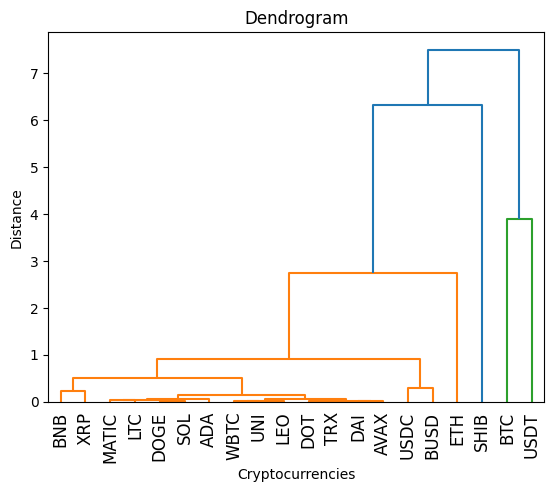

In [49]:
subset_data = data[['Volume', 'MarketCap', 'CirculatingSup']]
subset_data = StandardScaler().fit_transform(subset_data)
result = shc.linkage(subset_data, method='ward')
shc.dendrogram(result, orientation='top', labels=data['Symbol'].values, distance_sort='descending')
plt.title('Dendrogram')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

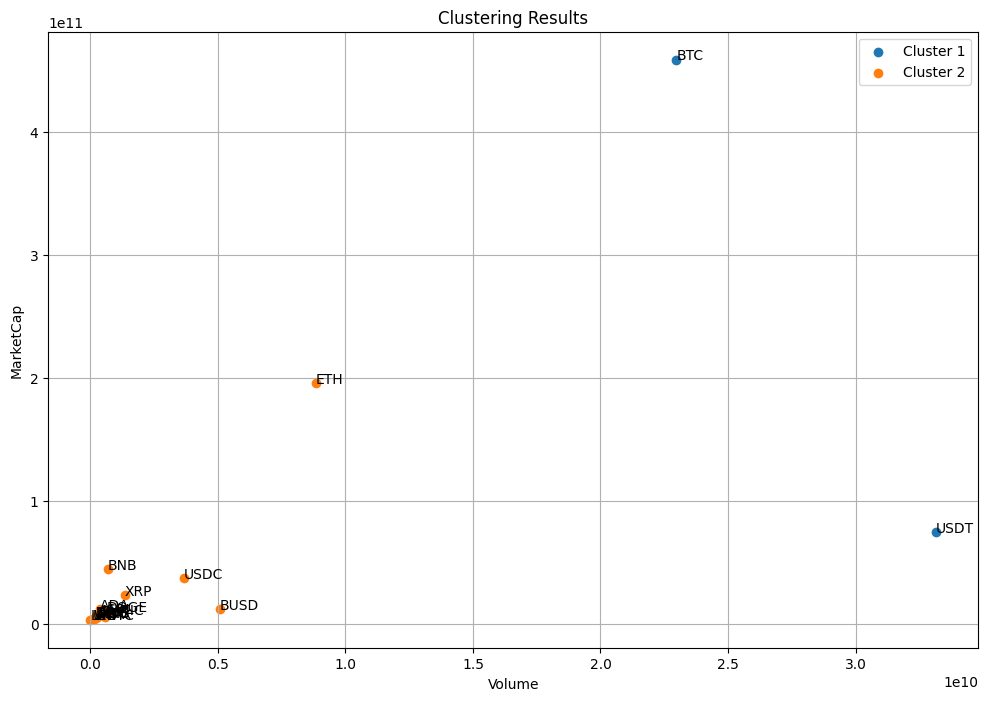

In [50]:
clusters = fcluster(result, t=2, criterion='maxclust')
data_copy = data.copy()
data_copy['Cluster'] = clusters.copy()

plt.figure(figsize=(12, 8))
for i in range(1, 3):
    cluster = data_copy[data_copy['Cluster'] == i]
    plt.scatter(cluster['Volume'], cluster['MarketCap'], label=f'Cluster {i}')
    for index, row in cluster.iterrows():
        plt.annotate(row['Symbol'], (row['Volume'], row['MarketCap']))

plt.xlabel('Volume')
plt.ylabel('MarketCap')
plt.title('Clustering Results')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
Dimensions = {
    'Volume': cluster['Volume'],
    'MarketCap': cluster['MarketCap'],
    'CirculatingSup': cluster['CirculatingSup']
}

Dimensions = pd.DataFrame(Dimensions)
# رسم نمودار سه بعدی
fig = px.scatter_3d(Dimensions, x='Volume', y='MarketCap', z='CirculatingSup')
fig.update_layout(width=1000, height=800)

# نمایش نمودار
fig.show()
